### Social background:

On May 8, 2020, United Nations Secretary-General Antonio Guterres said that “the pandemic continues to unleash a tsunami of hate and xenophobia, scapegoating and scare-mongering” and urged governments to “act now to strengthen the immunity of our societies against the virus of hate.”
In this part we want to visualize the relationship between covid-19 and discrimination towards Asian.

### Methodology:

We quantified the discrimination towards Asians as number of articles that included the key word "anti-Asian" for each month starting from 2018 to 2022, in which 2018's and 2019's data as reference. Then we quantified the impact from Covid-19 using the number of covid-19 caused death and number of covid cases in each month since 202001, when the covid was first reproted in the US.

We used the NYtimes api (https://developer.nytimes.com/apis) to search for the articles that included the word "anti-Asian" and each request will return at most 10 results for a given page. In that case, we wrote a function to continouly reqest for all the pages and stop when the page returned no result. At the same time, this funciton measured the number of results in each page for a give month, e.g. 20190101 to 20190201, and summed up to get the total number of anti-Asian articles of each month.

We obtained the number of death and cases from the NYtime official github. (https://github.com/nytimes/covid-19-data)

Then we combined these to data in plot to visulize their relationship.
 

### Result

#### number of anti-asian articles vs number of covid-19 cases

Text(0.5, 1.0, 'Number of Anti-Asian Articles vs Covid Cases')

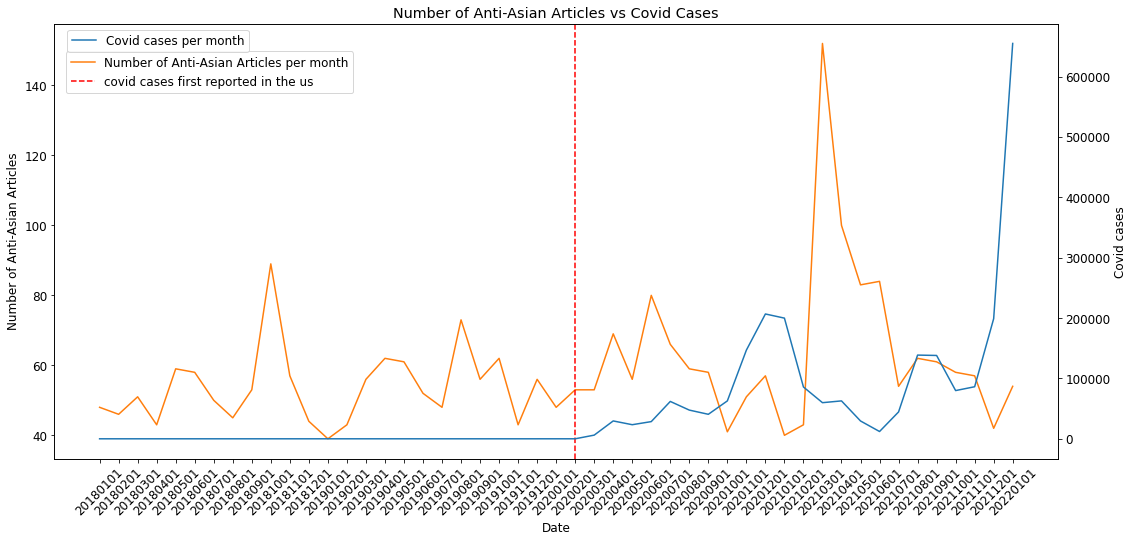

In [20]:
# setup the seize of the plot
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(18, 8))
ax2 = ax.twinx()

# Specify how our lines should look: x-axis = date, y-axis_1 = number of anti-asian articles, y-axis_1 = covid-19 cases
ax.plot(total.begin_date, total.num_article, color='tab:orange', label = 'Number of Anti-Asian Articles per month')
ax2.plot(total.begin_date, montly_case, color='tab:blue', label = 'Covid cases per month')
ax.axvline(x='20200201', color='red', linestyle='--', label = 'covid cases first reported in the us')

# label x-axis, y-axis, and title
ax.set_xlabel('Date')
ax.set_ylabel('Number of Anti-Asian Articles')
ax2.set_ylabel('Covid cases')
# roate the x axis label by 45 degree
ax.tick_params(axis='x', labelrotation = 45)
ax.legend(bbox_to_anchor=(0.304, 0.95))
ax2.legend(bbox_to_anchor=(0.2, 1))
ax.set_title("Number of Anti-Asian Articles vs Covid Cases")

#### number of anti-asian articles vs number of covid-19 death

Text(0.5, 1.0, 'Number of Anti-Asian Articles vs Covid Death')

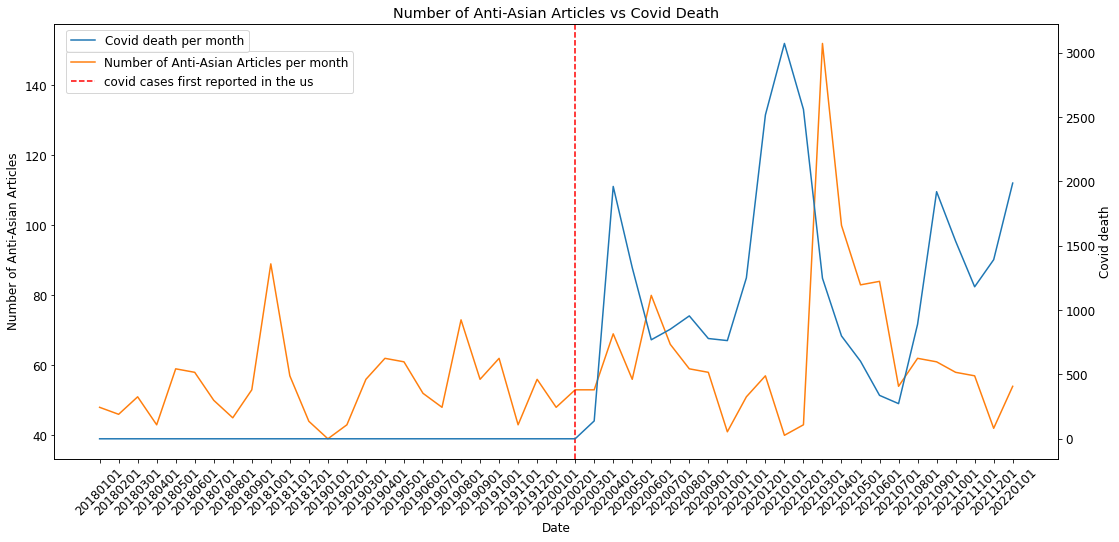

In [21]:
# setup the seize of the plot
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(18, 8))
ax2 = ax.twinx()

# Specify how our lines should look: x-axis = date, y-axis = market_cap
ax.plot(total.begin_date, total.num_article, color='tab:orange', label = 'Number of Anti-Asian Articles per month')
ax2.plot(total.begin_date, montly_death, color='tab:blue', label = 'Covid death per month')
ax.axvline(x='20200201', color='red', linestyle='--', label = 'covid cases first reported in the us')

# label x-axis, y-axis, and title
ax.set_xlabel('Date')
ax.set_ylabel('Number of Anti-Asian Articles')
ax2.set_ylabel('Covid death')
# roate the x axis label by 45 degree
ax.tick_params(axis='x', labelrotation = 45)
ax.legend(bbox_to_anchor=(0.304, 0.95))
ax2.legend(bbox_to_anchor=(0.2, 1))
ax.set_title("Number of Anti-Asian Articles vs Covid Death")

### Observations and Comments

It is obvious that the number of articles included the workd "anti-Asian" overly increased after the starting of covid-19 pandemic. There is not a clear relationship between the number of covid-19 cases per month and number of anti-asian articles. However, there is always a very significant incrase in the number of anti-Asian articles following a pead of number of covid-19 caused death (202003 and 202011), which indicates an increase in discrimination towards Asian after going through a large number of covid caused death. Based on these features, we can conclude that covid-19 does increase the discrimination towards Asians. 

### Anti-Asian Code

In [9]:
import requests
import pandas as pd
import numpy as np

In [ ]:
# a functino to find the number of articles in each page for a given month
def find_article_n(begin, end):
    session = requests_cache.CachedSession('demo_cache')
    con = True
    i = 0
    num_art = 0
    while con == True:
        sc = session.get("https://api.nytimes.com/svc/search/v2/articlesearch.json?", params = {
            "q":"anti-asian",
            "page":str(i),
            "page-size":"50",
            "begin_date":begin,
            "end_date":end,
            "api-key":"WFGQS8gKLAUWGvAnphJLOO2uN5MH4jyJ"
        })
        sc.raise_for_status()
        if len(sc.json()['response']['docs']) != 0:
            num_art += len(sc.json()['response']['docs'])
            i += 1
        else:
            con = False
        time.sleep(10)
    return(num_art)


In [2]:
# We modified the for loop several times to get the exact total data from 201801 to 202201 and saved in the 
# file all_year_articlecase and death.csv.
for i in range(1):
    begin = '20220'+str(i+1)+'01'
    end = '20220'+str(i+2)+'01'
    this_mon = find_article_n(begin, end)
    begin_date.append(begin)
    end_date.append(end)
    num_art.append(this_mon)
    time.sleep(10)
total = pd.read_csv('/Users/pilehe/Desktop/sta 141b/homework/project/all_year_article.csv')

In [5]:
death_case = pd.read_csv('/Users/pilehe/Desktop/sta 141b/homework/project/case and death.csv')
monthly_case_2 = death_case['case']
monthly_death_2 = death_case['death']
montly_case = [0]*24
montly_death = [0]*24
montly_case.extend(monthly_case_2)
montly_death.extend(monthly_death_2)

In [15]:
total['begin_date']= total['begin_date'].astype(str)

### Reference

Nytimes api: https://developer.nytimes.com/apis
Nytimes Covid-19 github: https://github.com/nytimes/covid-19-data